# 01 Momentum agent baseline

#### 👉Before you try to solve a Reinforcement Learning problem you should get a grasp of its difficulty.

#### 👉 To do so, you need to design a dummy agent that can peform the task without much brains, and evaluate its performance.

#### 👉A simple way to do so is by using a Random Agent, that chooses its next action randomly, without paying attention at the current state of the environment.

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [2]:
import gym
env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000

## Momentum agent 🤖

In [12]:
from src.momentum_agent import MomentumAgent
agent = MomentumAgent(env)

from src.loops import evaluate
n_episodes = 1000
rewards, max_positions = evaluate(agent, env, n_episodes)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 176.90it/s]


## And the success rate is... bad...

In [13]:
n_completed = sum([1 if m > 0.5 else 0 for m in max_positions])
print(f'{n_completed} success out of {n_episodes} attempts')

1000 success out of 1000 attempts


## Let's see how far we got in each attempt

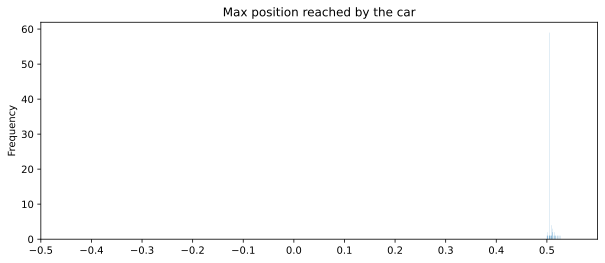

In [9]:
import matplotlib.pyplot as plt
import pandas as pd


fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Max position reached by the car")    
ax.set(xlim=(-0.5, 0.6), xticks=np.arange(-0.5, 0.6, 0.1))
pd.Series(max_positions).plot(kind='hist', bins=100)

plt.show()

## Let's see our agent in action 🎬

In [10]:
from src.viz import show_video

show_video(agent, env, sleep_sec=0.01)

## And plot the policy 🎨

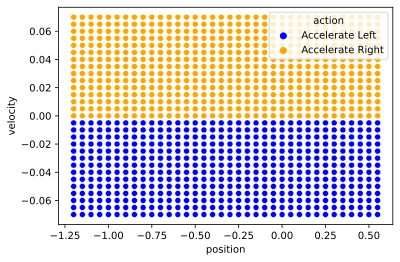

In [11]:
from src.viz import plot_policy

positions = np.arange(env.min_position, env.max_position, 0.05)
velocities = np.arange(-env.max_speed, env.max_speed, 0.005)
plot_policy(agent, positions, velocities)